In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline


In [2]:
df_sample = pd.read_csv('sample_submission.csv', sep='\t', encoding='utf8')
df_train = pd.read_csv('train.csv', sep='\t', encoding='utf8')
df_test = pd.read_csv('test.csv', sep='\t', encoding='utf8')

In [3]:
df_train.shape

(24712, 22)

In [4]:
df_test.shape

(16476, 21)

In [5]:
df_sample.shape

(16476, 2)

In [6]:
#проверим наши данные на наличие пропусков
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 21 columns):
_id               16476 non-null object
age               16476 non-null int64
job               16476 non-null object
marital           16476 non-null object
education         16476 non-null object
default           16476 non-null object
housing           16476 non-null object
loan              16476 non-null object
contact           16476 non-null object
month             16476 non-null object
day_of_week       16476 non-null object
duration          16476 non-null int64
campaign          16476 non-null int64
pdays             16476 non-null int64
previous          16476 non-null int64
poutcome          16476 non-null object
emp.var.rate      16476 non-null float64
cons.price.idx    16476 non-null float64
cons.conf.idx     16476 non-null float64
euribor3m         16476 non-null float64
nr.employed       16476 non-null float64
dtypes: float64(5), int64(5), object(11)
memory usa

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 22 columns):
_id               24712 non-null object
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
dtypes: floa

In [8]:
df_train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
count,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000
mean,40.030188,258.345298,2.580163,963.558797,0.171900,0.082713,93.576386,-40.516077,3.619397,5166.988111,0.112779
std,10.462301,261.573344,2.776757,184.224885,0.491511,1.572300,0.579548,4.639359,1.737099,72.516221,0.316329
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,4918.000000,43.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [9]:
df_train.iloc[1:5,].T

,1,2,3,4
_id,905a0b9a5456ee962223033473666be3,02d69c07ec6d68e31d641edd45ce61cd,e492fbe0cccaf67cdb5c0944dbc8a167,ac2dc6f5835bdea8e71dd99b65208d07
age,36,53,34,29
job,services,blue-collar,blue-collar,services
marital,single,married,married,single
education,basic.4y,basic.4y,basic.9y,university.degree
default,no,no,no,no
housing,no,yes,yes,yes
loan,no,no,yes,no
contact,telephone,cellular,telephone,telephone
month,may,aug,may,aug


In [10]:
# посмотрим немного на наши данные
#df_train['pdays'].hist()
print(df_train[df_train['pdays']==999][['pdays']].count())
print(df_train[df_train['pdays']<999][['pdays']].count())
df_train[df_train['pdays']==999][['_id','pdays','target']].pivot_table(values = '_id', index = 'pdays', columns = 'target', aggfunc='count')


pdays    23830
dtype: int64
pdays    882
dtype: int64


target,0,1
pdays,,
999,21617,2213


In [11]:
# посмотрим еще на duration
pivot = df_train[['_id','target','duration']].pivot_table(values = '_id', index = 'duration', columns = 'target', aggfunc='count')
limit = 0
for j, i in enumerate(pivot[0]):
    if i > 0:
        limit += i
    else: break
print (j-1,limit)

618 20939.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002389B473C18>]], dtype=object)

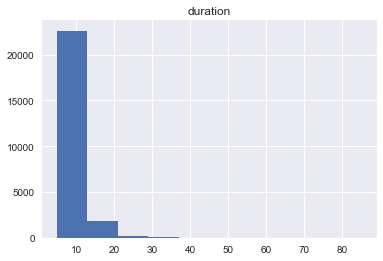

In [12]:
(df_train[['duration']]//300*5 + 5).hist()

In [13]:
df_test.head(5)

,_id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,66810d8e6bf2b41c880a7bc6c8a1e295,57,technician,married,high.school,no,no,yes,cellular,may,...,371,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
1,ccac3879652b08cb8b44c1920fd93afa,55,unknown,married,unknown,unknown,yes,no,telephone,may,...,285,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
2,fcccab4d7a76f70647f015f2c84c2af8,33,blue-collar,married,basic.9y,no,no,no,cellular,may,...,52,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1
3,ed8399278c30678dab739045fa12b440,36,admin.,married,high.school,no,no,no,telephone,jun,...,355,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
4,1d4d62ac5cabcb48bac7112813f290cb,27,housemaid,married,high.school,no,yes,no,cellular,jul,...,189,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1


In [14]:
y = df_train['target'].values

In [15]:
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [16]:
#объединим test и train в один dataframe для предобработки
df = pd.concat([df_train.drop(['target'], axis =1), df_test], axis=0, ignore_index=True)

In [17]:
def _convert_(s, f):
    if f == 'duration':
        return str(s//300*5 +5)
    elif f == 'pdays':
        return str(s//3*3 + 3)

In [18]:
#преобразуем данные по продолжительности звонков, разбив на интервалы
df['duration'] = df['duration'].map(lambda s: _convert_(s, 'duration'))
df['pdays'] = df['pdays'].map(lambda s: _convert_(s, 'duration'))

In [22]:
def preprocess_data(df_input):
    df_output = df_input
    df_output = pd.get_dummies(df_output)
    return df_output

In [23]:
df_preproc = df.drop(['_id'], axis = 1).pipe(preprocess_data)

In [24]:
df_preproc.head(5)

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,...,duration_55,duration_60,duration_65,duration_70,duration_85,pdays_20,pdays_5,poutcome_failure,poutcome_nonexistent,poutcome_success
0,54,1,0,1.4,93.444,-36.1,4.963,5228.1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,36,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,53,1,0,1.4,93.444,-36.1,4.965,5228.1,0,1,...,0,0,0,0,0,1,0,0,1,0
3,34,2,0,1.1,93.994,-36.4,4.857,5191.0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,29,1,0,-1.7,94.027,-38.3,0.890,4991.6,0,0,...,0,0,0,0,0,1,0,0,1,0


In [25]:
df_preproc.columns

Index(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
    

In [26]:
train_sample_size = df_train.shape[0]

In [27]:
X = df_preproc.iloc[:train_sample_size,:].values #train выборка
X_pred = df_preproc.iloc[train_sample_size:,:].values #test (предсказательная) выборка

In [28]:
# начнем с KNN 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
classifier = KNeighborsClassifier()

In [35]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [36]:
# воспользуемся GridSearch для подбора параметров модели
from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors': [5, 10, 25, 50, 100], 
               'weights': ['uniform','distance'],
               'algorithm': ['auto'],
               'p':[1,2]}]
        
grid_search = GridSearchCV(estimator=classifier,
                          param_grid = parameters,
                          scoring = 'roc_auc',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [37]:
grid_search.best_score_

0.86937731207486202

In [38]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=1,
           weights='uniform')

In [39]:
# попробуем скорректировать количесвто соседей 

In [40]:
parameters = [{'n_neighbors': [90, 100, 110, 120],
              'weights':['distance', 'uniform'],
               'p':[1,2]
              }] 
        
grid_search = GridSearchCV(estimator=classifier,
                          param_grid = parameters,
                          scoring = 'roc_auc',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [41]:
grid_search.best_score_

0.86948194045180471

In [42]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=90, p=1,
           weights='distance')

In [43]:
classKNN = grid_search.best_estimator_

In [44]:
########################## NNeighbors #####################################
# параметры нашей модели: 
#KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
#           metric_params=None, n_jobs=1, n_neighbors=90, p=1,
#           weights='distance')
###########################################################################

In [45]:
# посмотрим на решающие деревья

In [46]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [47]:
parameters = [{'class_weight': [None, 'balanced'],
               'criterion': ['gini', 'entropy'], 
               'max_depth': [1,2,4,6,8,10],
               'max_features': [2,3,4,5,6,7,8,9,10],
               'min_samples_leaf': [1,2,3,4,5,6]
              }]
        
grid_search = GridSearchCV(estimator=classifier,
                          param_grid = parameters,
                          scoring = 'roc_auc',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [48]:
grid_search.best_score_

0.89600407796939974

In [49]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=10, max_features=9, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=6,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [50]:
classTree = grid_search.best_estimator_

In [51]:
########################## Decision Trees ##################################
#DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
#            max_depth=8, max_features=10, max_leaf_nodes=None,
#            min_impurity_split=1e-07, min_samples_leaf=6,
#            min_samples_split=2, min_weight_fraction_leaf=0.0,
#            presort=False, random_state=None, splitter='best')
###########################################################################

In [52]:
df_preproc.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'p_fact',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct'

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
X_scaled = scaler.fit_transform(df_preproc.values)

In [32]:
X_train_log, X_test_log, y_train_log, y_test_log = \
train_test_split(X_scaled[0:train_sample_size,:], 
                 y, 
                 test_size=0.3, 
                 random_state=42)
X_true_log = X_scaled[train_sample_size:,:]

In [33]:
X_true_log.shape

(16476, 78)

In [ ]:
# теперь построим модель с помощью логистической регрессии
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

parameters = [{'C': [0.1, 1, 10], 
               'fit_intercept': [True, False],
               'max_iter': [100],
               'penalty': ['l2'], 
               'solver': ['newton-cg', 'lbfgs', 'sag'],
               'class_weight': [None, 'balanced']},
             {'C': [0.1, 1, 10], 
               'fit_intercept': [True, False],
               'max_iter': [100],
               'penalty': ['l1'], 
               'solver': ['liblinear'],
               'class_weight': [None, 'balanced']}]

grid_search = GridSearchCV(estimator=classifier,
                          param_grid = parameters,
                          scoring = 'roc_auc',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train_log, y_train_log)

In [58]:
grid_search.best_estimator_

LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [59]:
classLog = grid_search.best_estimator_

In [60]:
grid_search.best_score_

0.92606289702730638

In [58]:
########################## Regression ##################################
#LogisticRegression(C=1, class_weight='balanced', dual=False,
#          fit_intercept=True, intercept_scaling=1, max_iter=100,
#          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
#          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
###########################################################################

In [59]:
################################## Model selection #########################
# Модели обсчитаны, выберем наиучшую

In [61]:
def model_roc_auc_curve (_classifier, _Xtrain, _ytrain, _Xtest, _ytest):
    _classifier.fit(_Xtrain, _ytrain)
    y_hat_proba = _classifier.predict_proba(_Xtest)
    preds = y_hat_proba[:,1]
    fpr, tpr, threshold = roc_curve(_ytest, preds)
    roc_auc = auc(fpr, tpr)
    
    return fpr, tpr, roc_auc, threshold, preds

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [63]:
classKNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=90, p=1,
           weights='distance')

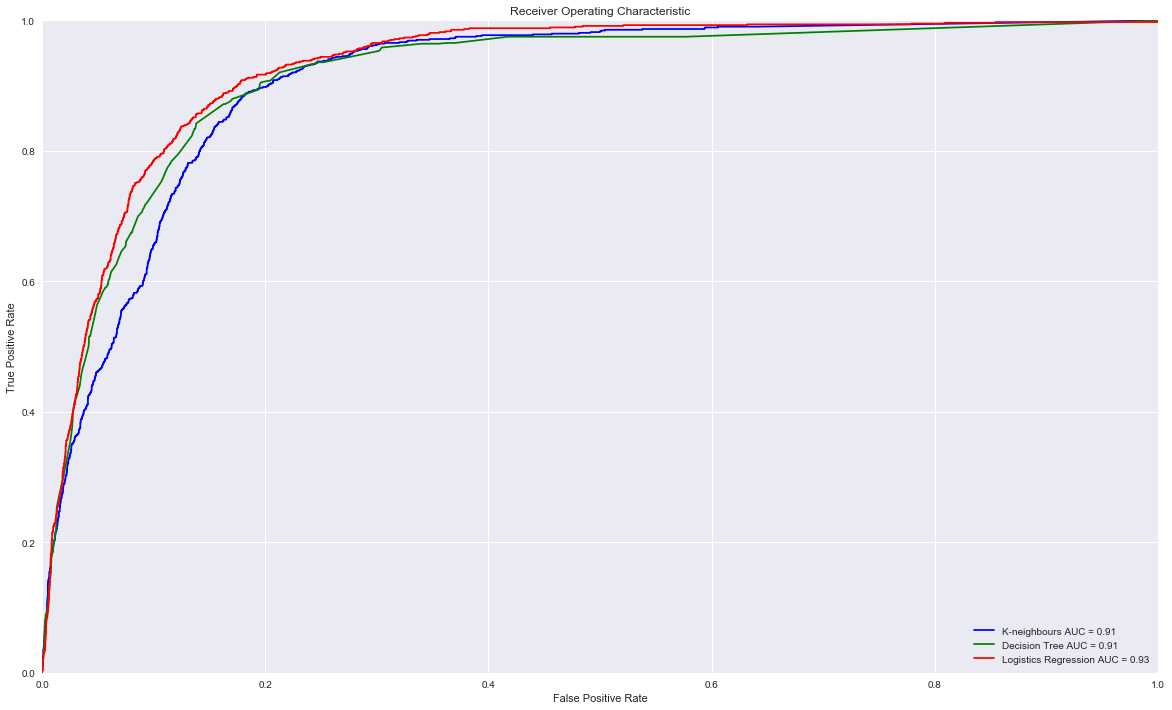

In [64]:
#построим модели roc_auc_curve для них
import matplotlib.pyplot as plt
plt.figure(figsize=[20,12])
plt.title('Receiver Operating Characteristic')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# KNN
fpr, tpr, roc_auc, threshold, preds = model_roc_auc_curve(classKNN, X_train, y_train, X_test, y_test)
#print(roc_auc_score(y_test, preds), roc_auc)
plt.plot(fpr, tpr, 'b', label = 'K-neighbours AUC = %0.3f' % roc_auc)

# Decision trees

fpr, tpr, roc_auc, threshold, preds = model_roc_auc_curve(classTree, X_train, y_train, X_test, y_test)
#print(roc_auc_score(y_test, preds), roc_auc)
plt.plot(fpr, tpr, 'g', label = 'Decision Tree AUC = %0.3f' % roc_auc)

#Logistics Regression

fpr, tpr, roc_auc, threshold, preds = model_roc_auc_curve(classLog, X_train_log, y_train_log, X_test_log, y_test_log)
#print(roc_auc_score(y_test, preds), roc_auc)
plt.plot(fpr, tpr, 'r', label = 'Logistics Regression AUC = %0.3f' % roc_auc)

plt.legend(loc = 'lower right')
plt.show()

In [65]:
# предскажем, используя регрессию
y_hat_pred = classLog.predict(X_true_log)
y_hat_pred_proba = classLog.predict_proba(X_true_log)

In [68]:
for k, j in enumerate(tpr):
    if j > 0.95:
        print (k, j,threshold[k])
        
        break

862 0.950177935943 0.480485312155


In [69]:
df_tmp = df_test[['_id']]
# зададим порог threshold
proba = pd.DataFrame(y_hat_pred_proba[:,1],columns = ['target'])
proba[proba['target']>= threshold[k]] = 1
proba[proba['target']< threshold[k]] = 0

In [70]:
df_result = pd.concat([df_tmp,proba],axis = 1, names = ['_id','target'])

In [71]:
df_result.head(5)

,_id,target
0,66810d8e6bf2b41c880a7bc6c8a1e295,1.0
1,ccac3879652b08cb8b44c1920fd93afa,0.0
2,fcccab4d7a76f70647f015f2c84c2af8,0.0
3,ed8399278c30678dab739045fa12b440,1.0
4,1d4d62ac5cabcb48bac7112813f290cb,0.0


In [72]:
df_result.to_csv('submission.csv', sep=',', encoding='utf8',index = False)